In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/prices_round_2_day_0.csv', sep=';')

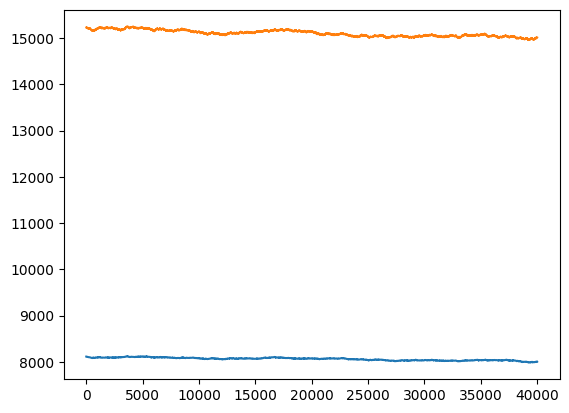

In [3]:
plt.plot(data[data['product'] == 'COCONUTS']['mid_price'])
plt.plot(data[data['product'] == 'PINA_COLADAS']['mid_price'])

In [11]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller

coco = data[data['product'] == 'COCONUTS']['mid_price']
pina = data[data['product'] == 'PINA_COLADAS']['mid_price']


model = sm.OLS(coco.to_numpy(), pina.to_numpy()).fit()
model.params[0]

0.5338352293479572

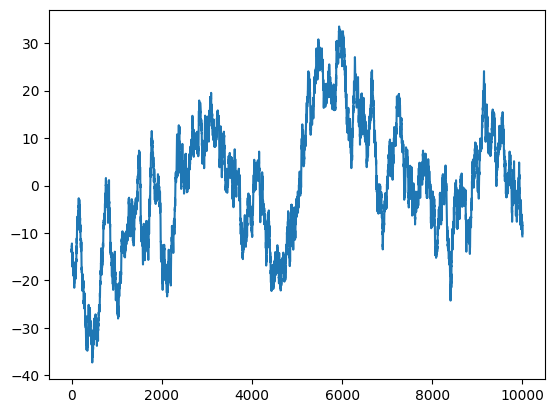

In [19]:
spread = coco.to_numpy() - model.params[0] * pina.to_numpy()
plt.plot(spread)

In [22]:
adf = adfuller(spread, maxlag=1)
print(adf[0])
print(adf[4])

-3.0521830758048245
{'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}
